<a href="https://colab.research.google.com/github/TranNhatHan/LamBt/blob/main/BtPandas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [2]:
dt = pd.read_csv("/content/drive/MyDrive/database.csv")
dt

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.0,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.0,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.0,...,1,0,0,0,0,0,0,0,0,0


Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [3]:
summary = dt.describe()

In [4]:
var = pd.DataFrame([dt.var()], index = ["var"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [5]:
summary.append(var)

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,1.741040e+05,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,1.036770e+05,...,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,2.412040e+05,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,8.310323e+02,...,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,9.401368e+04,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1.803651e+03,...,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1.000000e+03,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.054118e+05,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.491025e+05,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,5.000000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.225922e+05,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,8.000000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.674450e+05,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,3.130000e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
var,8.838572e+09,45.531561,7.784949,77.429531,0.763497,121.510088,0.220312,4.032884,2.076482,3.253156e+06,...,0.092156,0.004710,0.044104,0.005779,0.011109,0.004158,0.005926,0.004198,0.082496,0.008908


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các
ngoại lệ không?nếu có thì ở cột nào?

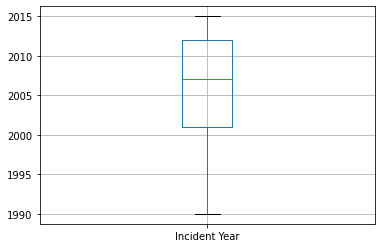

In [6]:
dt.boxplot(column='Incident Year')

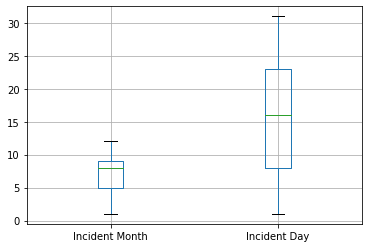

In [7]:
dt.boxplot(column = ['Incident Month', 'Incident Day'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


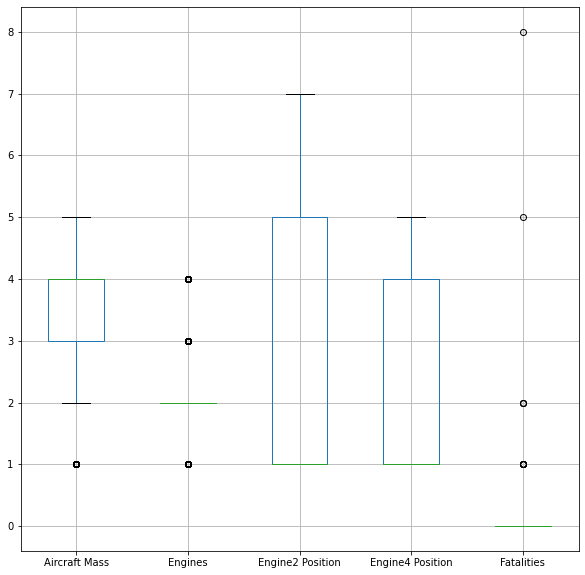

In [8]:
dt.boxplot(column = ['Aircraft Mass', 'Engines', 'Engine2 Position', 'Engine4 Position', 'Fatalities'], figsize = (10, 10))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


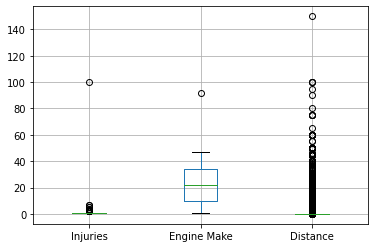

In [9]:
dt.boxplot(column = ['Injuries','Engine Make', 'Distance'])

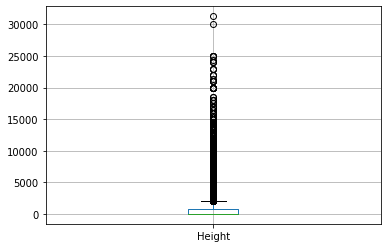

In [10]:
dt.boxplot(column = ['Height'])

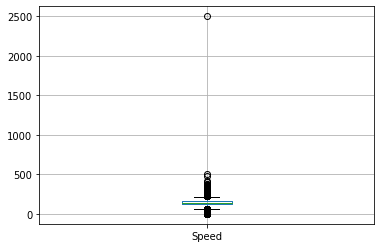

In [11]:
dt.boxplot(column = ['Speed'])

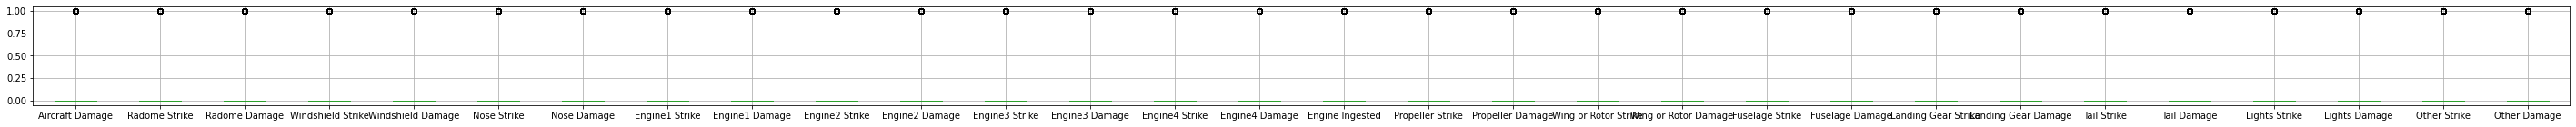

In [12]:
dt.boxplot(column = ['Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike',
       'Fuselage Damage', 'Landing Gear Strike', 'Landing Gear Damage',
       'Tail Strike', 'Tail Damage', 'Lights Strike', 'Lights Damage',
       'Other Strike', 'Other Damage'], figsize = (50, 2))

Ta thấy các cột Aircraft Mass, Engines, Fatalities, Injuries, Engine Make, Distance,Speed, Height là các cột có giá trị ngoại lệlệ

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

In [20]:
a = pd.DataFrame(dt["Record ID"])

In [21]:
a[(np.abs(stats.zscore(a)) < 3).all(axis=1)]

,Record ID
0,127128
1,129779
2,129780
3,2258
4,2257
...,...
174099,366091
174100,365902
174101,365903
174102,366046


In [7]:
df = pd.DataFrame(np.random.randn(500000, 70))

from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-0.020277,-1.338626,0.383472,-1.500049,1.334226,1.942735,-1.375206,1.332515,-0.531545,0.188153,...,1.355939,-0.307365,1.866866,-1.172708,0.217254,-1.017525,-0.818057,-1.614988,0.491561,-1.940199
1,0.656082,-1.948431,-2.317761,0.211977,-0.357462,0.251060,-0.606050,-0.390921,-0.303782,1.525207,...,0.657626,0.023066,0.753290,-0.562764,-1.534647,-0.737955,-0.722304,0.806133,0.951992,-1.611403
2,-0.837352,0.014540,1.424370,1.228502,-0.182134,0.875186,-0.760524,1.703638,-0.801325,-0.172219,...,1.810807,0.362891,0.886055,1.907954,-0.854247,0.798801,-0.401719,-0.111327,-1.822781,-1.551324
4,0.602833,0.260377,0.630995,-2.429434,1.081593,-0.072632,-0.819354,-0.772839,1.822790,0.313914,...,-1.243946,2.750707,1.050749,0.417917,0.927490,0.697604,0.995620,-1.655921,0.097825,0.760401
5,0.699436,-0.232980,-0.473756,0.692460,1.925829,-0.444949,-0.204346,-1.331741,1.682082,1.071928,...,-0.019172,-1.183139,0.657313,1.060070,-0.073854,0.478033,0.261404,-0.378682,0.712352,-1.239916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,-0.021380,1.088593,-1.351692,-1.827128,1.000491,1.126732,1.725924,1.861812,-0.982634,0.012061,...,0.528821,0.337415,1.112248,-0.032559,-1.846491,-0.203506,1.000817,0.310223,1.173057,0.377699
499995,-1.124279,0.980071,-1.131090,-0.822351,0.204315,1.420906,2.460336,-0.470126,-0.734108,-1.218101,...,-0.678275,-0.351935,0.188975,-0.083946,0.474888,-1.199825,-0.030528,-1.101278,0.215297,0.050281
499996,-0.720920,0.953332,-2.225456,0.587032,-0.177672,-0.154007,0.503852,0.632638,0.260441,-1.834791,...,0.052458,0.882549,-0.390995,-0.442437,-1.475645,0.982942,0.976745,0.852229,-0.288763,-0.716026
499997,-0.754745,-0.964651,-0.934048,-0.685707,-1.122500,0.350276,0.521591,-0.823977,-1.971487,1.075772,...,-0.812444,1.704461,-0.427878,-2.798357,0.219699,0.316429,-0.551830,-0.580411,-0.274129,0.688288
